# Task 1- Prediction using Supervised ML
## Mishu Singh

In [24]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Reading the Comma Separated Values(.csv)file and then importing the dataset

In [2]:
#importing the data
path = "http://bit.ly/w-data"
data = pd.read_csv(path)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Let's understand the data

In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Checking for missing values

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

We can see that there is no missing values in any column

### Data Visualization

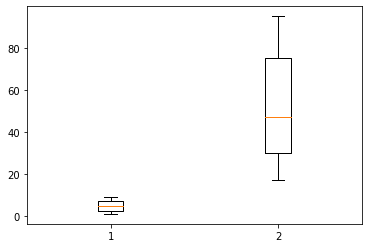

In [9]:
plt.boxplot(data)
plt.show()

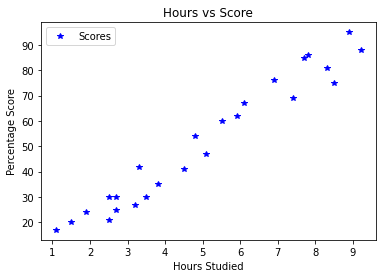

In [8]:
data.plot(x='Hours', y='Scores', style='*', color='blue')
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

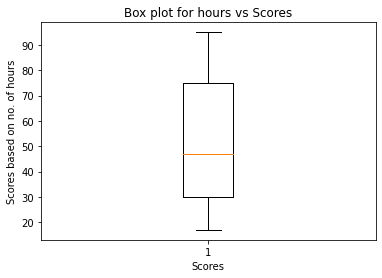

In [12]:
data_scores = data['Scores']
plt.boxplot(data_scores)
plt.title('Box plot for hours vs Scores')
plt.xlabel('Scores')
plt.ylabel('Scores based on no. of hours')
plt.show()

C:\Users\Mishu Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

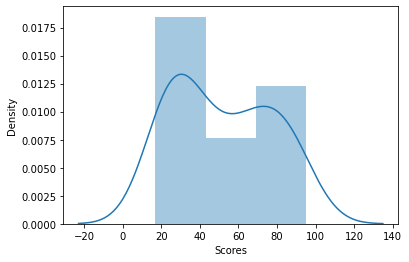

In [49]:
#Plotting the distribution plot for Scores
sns.distplot(data['Scores'])

In [50]:
#Calculating the correlation among variables
correlation = data.corr(method= 'pearson')
print(correlation)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


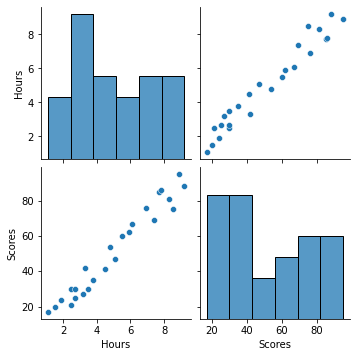

In [51]:
#Pairplot
sns.pairplot(data)

###### Performing Simple Linear Regression

In [22]:
#Preparing Data
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [23]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


###### Splitting the data into training and testing dataset

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.80, test_size= 0.20, random_state = 0)

###### Training the Algorithm

In [28]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training complete")

Training complete


In [32]:
#B0= Intercept, B1= Slope of the line
print("B0 =",regressor.intercept_, "\nB1 =", regressor.coef_)

B0 = 2.018160041434683 
B1 = [9.91065648]


In [35]:
#Plotting the regression line
line = regressor.intercept_ + regressor.coef_*X_train

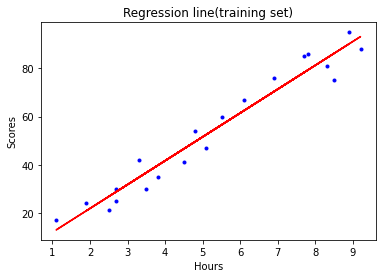

In [42]:
#Plotting for the training dataset
plt.scatter(X_train, y_train, color =  'blue', marker='.' )
plt.plot(X_train,line,color='red')
plt.title("Regression line(training set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

###### Building a Linear Model by Statsmodel.api

In [38]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, x_train_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           2.79e-13
Time:                        19:29:37   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.517      -4.404       8.441
x1             9.9107      0.527     18.802      0.000       8.803      11.018
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.720
Skew:                          -0.296   Prob(JB):                        0.423
Kurtosis:                       1.691   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Predictions

In [39]:
y_pred = regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [40]:
# Predicting Actual vs Predicted Score
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


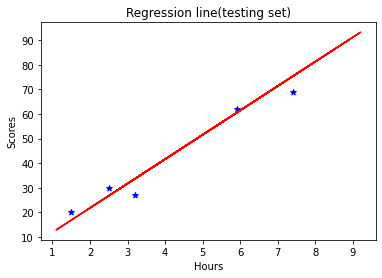

In [43]:
#Plotting for the testing dataset
plt.scatter(X_test, y_test, color =  'blue', marker='*' )
plt.plot(X_train,line,color='red')
plt.title("Regression line(testing set)")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

###### Evaluation

In [45]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [46]:
# Calculating the R-Squared value of the model for cheching the goodness of fit
metrics.r2_score(y_test, y_pred)

0.9454906892105356

The R-Squared Value we get is 0.9454906892105356, which shows that our model is good

In [52]:
#Calculating the Squared Errors
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)

MSE =  21.5987693072174
RMSE =  4.6474476121003665


###### Predicting the score for a student studying 9.25 hours per day

In [48]:
Predicted_score = regressor.predict([[9.25]])
print("Predicted score of a student studying 9.25 hours per day is: ", Predicted_score)

Predicted score of a student studying 9.25 hours per day is:  [93.69173249]
